<img src="https://hubmapconsortium.org/wp-content/uploads/2019/01/HuBMAP-Retina-Logo-Color.png" alt="Human Biomolecular Atlas Program" />

<div align="center"><h1 style="font-size: 4em"> <b>Hacking the kidney</b></h1></div>
<p style="font-size:1.2em"> If you feel this is something new and fresh, and it added some value to you, please consider <font color='orange'>upvoting</font> 😄</p>
<p style="font-size:1.2em"><font color="red">NOTE</font> due to the size of the images, trying to read and show different images may consume all the memory and the session will automatically restart</p>

## <font size='8' color='blue'>Contents</font> 


<p>
    <ul style="font-size:1.2em">
        <li><font color='blue'>Introduction</font></li>
        <li><font color='blue'>Importing the necessary libraries</font></li>
        <li><font color='blue'>The Data</font></li>
        <ul>
            <li><font color='blue'>Analyzing images and contours</font></li>
            <li><font color='blue'>Analyzing patient data</font></li>
        </ul>
        <li>Work in progress...</li>
    </ul>  
</p>

<h2 style="font-size: 2em"> 1. <a id="Introduction">Introduction </a> 🏕️</h2>

<div>
    <p style="font-size:1.2em"> Our kidneys remove wastes and extra fluid from your body, they also remove the waste products generated by the chemical reactions carried out in our cells, and maintain a healthy balance of water, salts and minerals in our blood. This balance is essential for the other tissues to be in a good state and work normally.
        At a gross level, the kidney can be divide in the following parts:</p>
        
   <img src="https://i.pinimg.com/originals/d7/7e/f1/d77ef1baf5ee73d0153cf60002e55b46.jpg" alt="Parts of the Kidney" width="500" height="600"/>
    
   <p> <ul style="font-size:1.2em">
        <li><font color='black'>Renal Artery</font>: branches off of the aorta bringing waste-filled blood into the kidney </li>
        <li><font color='black'>Renal Vein</font>: removes the filtered blood from the kidneys to the inferior vena cava</li> 
        <li><font color='black'>Ureter</font>: collects filtrate and urine from the renal pelvis and takes it to the bladder</li>
        <li><font color='black'>Renal Pelvis</font>: that functions as a funnel for urine flowing to the ureter.</li>
        <li><font color='black'>nephron</font>: the functional unit of the kidney.
            <ul>
                <li><font color='black'>renal corpuscle</font>: <font style="text-decoration: underline;">Located whithin the <a href="https://en.wikipedia.org/wiki/Renal_cortex">cortex</a></font>, consists of a tuft of capillaries called <a href="https://en.wikipedia.org/wiki/Glomerulus_(kidney)">glomerulus</a> and an encompassing <a href="https://en.wikipedia.org/wiki/Bowman%27s_capsule">Bowman's capsule</a>
                <li><font color='black'>renal tubule</font>: The renal tubule extends from the corpuscle, in the <a href="https://en.wikipedia.org/wiki/Renal_cortex">cortex</a>, and descends into to the <a href="https://en.wikipedia.org/wiki/Renal_medulla">Medulla</a>
            </ul>
        <li><font color='black'>Parenchyma</font>: The parenchyma is the functional parts of an organ </li>
        <ul >
            <li><a href="https://en.wikipedia.org/wiki/Renal_medulla">Medulla</a>: It contains the renal corpuscles and part of the renal tubules</li>
            <li><a href="https://en.wikipedia.org/wiki/Renal_medulla">Cortex</a>: It contains some structures of teh nephrone, such as the vasa rectae, the venulae rectae, the medullary capillary plexus, the loop of Henle, and the collecting tubule.</li>
        </ul>
    </ul>
    </p>
</div>

<div>
    <p style="font-size:1.2em">
        In the following images we can see the anatomicla part that constitutes the glomerulus, a cartoon representation (Left), and an image of how it would actually look on a <a src="https://en.wikipedia.org/wiki/Periodic_acid%E2%80%93Schiff_stain">Periodic acid–Schiff</a> (PAS) image (Right), where we can apreciate the <a href="https://en.wikipedia.org/wiki/Glomerulus_(kidney)">glomerulus</a> envolved by the <a href="https://en.wikipedia.org/wiki/Bowman%27s_capsule">Bowman's capsule</a>
    </p>
  <div>
      <div>
        <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTVybo7lfOBNkxidBcNej1tfQXojCNiB9X6Q&usqp=CAU" alt="Snow" style="float: right; width: 50%; padding: 5px;">
      </div>
      <div>
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Bowman%27s_capsule_and_glomerulus.svg/250px-Bowman%27s_capsule_and_glomerulus.svg.png" alt="Forest" style="float: left; width: 50%; padding: 10px 100px; transform: rotate(-90deg);">
      </div>
  </div>
  
</div>

<div>
    <p style="font-size:1.2em"> 
        At a more granular level, we can notice that the <a href="https://en.wikipedia.org/wiki/Glomerulus_(kidney)">glomerulus</a> which is the structure of interest for <a href="https://www.kaggle.com/c/hubmap-kidney-segmentation/overview">this challenge</a>, is a component of the renal corpuscle, which itself is a component of a nephron, that is found within the <a href="https://en.wikipedia.org/wiki/Renal_medulla">Cortex</a>. The <a href="https://en.wikipedia.org/wiki/Glomerulus_(kidney)">glomerulus</a> is important because it represents the  component where the filtrartion of the blood begins, in it, the hydrostatic pressure provides the force for ultrafiltration.
    </p>
    <img src="https://blog.cambridgecoaching.com/hs-fs/hubfs/eden.png?width=665&height=540&name=eden.png" alt="Detailed parts of the Kidney" width="500" height="600"/>
    <p></p>
    <p style="font-size:1.2em">Here is a good video I found, if you want to learn more about the glomerulus and glomerular filtration</p>
</div>


In [1]:
from IPython.display import HTML
HTML('<center><iframe width="560" height="315" src="https://www.youtube.com/embed/SVqSqPOcahY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>')

<h2 style="font-size: 2em"> 2. <a id="Data">Importing the necessary libraries</a> 📗</h2>

In [2]:
%%capture
pip install seaborn --upgrade

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import sys
import matplotlib.pyplot as plt
import os
import cv2
import json
import pprint

#color
from colorama import Fore, Back, Style

<h2 style="font-size: 2em"> 3. <a id="Data">The Data </a> 🏕️</h2>

<h3 style="font-size: 1.5em"> 3.1 <a id="Data">Analyzing images and contours</a></h3>

In [4]:
def rle2mask(mask_rle, shape):
    # https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

def mask_to_contours(image, mask_layer, thickness):
    """ converts a mask to contours using OpenCV and draws them on the image"""
    contours, hierarchy = cv2.findContours(mask_layer.astype('uint8'), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    image = cv2.drawContours(image, contours, -1, color=(255,0,0),thickness=thickness)
    return image

In [5]:
#Data paths
img_path = "../input/hubmap-kidney-segmentation/train/0486052bb.tiff"
train_path = "../input/hubmap-kidney-segmentation/train.csv"
img_id = img_path.split("/")[-1].split(".")[0]
struct_path = "../input/hubmap-kidney-segmentation/train/" + img_id + "-anatomical-structure.json"
glm_path = "../input/hubmap-kidney-segmentation/train/" + img_id + ".json"

#Read the image an generate the binary mask from the RL encoded data
org_img = cv2.imread(img_path)
img = np.copy(org_img)
df_train = pd.read_csv(train_path)
mask = rle2mask(
    df_train[df_train["id"] == img_id]["encoding"].values[0], 
    (img.shape[1], img.shape[0])
)

#Merge image with glomeruli mask 
img = mask_to_contours(img, mask, thickness=-1)

#Extract contours of anathomical structures from json file
file = open(struct_path)
structures_json = json.load(file)

#Merge the image with the contours of the anathomical structures 
for structure in structures_json:
    my_class = structure['properties']['classification']['name']
    if my_class == 'Medulla': #Note that Medulla will be delimited by a green contour
        A = np.asarray(structure['geometry']['coordinates'])
        A = [np.swapaxes(A,0,1)]
        img = cv2.drawContours(img, A, -1, color=(0,255,0),thickness=50)
    else: #Note that Cortex will be delimited by a blue contour
        A = np.asarray(structure['geometry']['coordinates'])
        A = [np.swapaxes(A,0,1)]
        img = cv2.drawContours(img, A, -1, color=(0,0,255),thickness=50)

Notice that the  Medulla  is delimited by the  green  line, and the  Cortex  is delimited by a  blue  line
The  red  dots correspond to the  glomerulli 


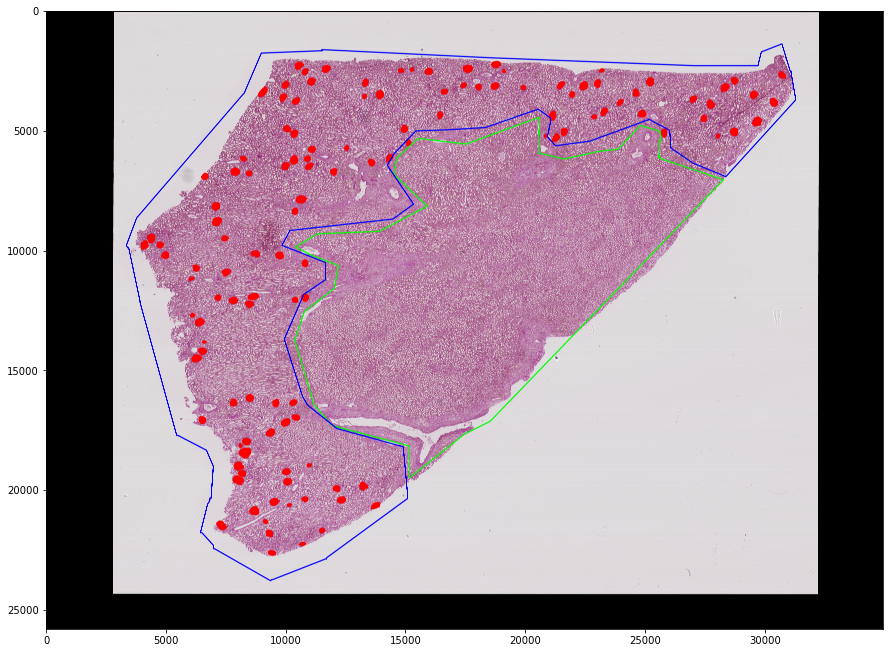

In [6]:
fig = plt.gcf()
fig.set_size_inches(15,12)
plt.imshow(img)
plt.grid(False)
print("Notice that the",Fore.GREEN, "Medulla",Style.RESET_ALL ,"is delimited by the", Fore.GREEN,"green",Style.RESET_ALL,"line, and the" ,Fore.BLUE, "Cortex",Style.RESET_ALL , "is delimited by a", Fore.BLUE,"blue",Style.RESET_ALL,"line")
print("The",Fore.RED, "red",Style.RESET_ALL ,"dots correspond to the",Fore.RED, "glomerulli",Style.RESET_ALL )
plt.show()

In [7]:
file = open(glm_path)
my_json = json.load(file)
print("This JSON file has", Fore.RED,len(my_json), Style.RESET_ALL ,"elements.")
print("Each element represent a", Fore.RED + "glomerulus", Style.RESET_ALL)
print("The first element is printed below")
print("\n")
pprint.pprint(my_json[0])

This JSON file has  126  elements.
Each element represent a glomerulus 
The first element is printed below


{'geometry': {'coordinates': [[[4747, 9606],
                               [4636, 9664],
                               [4616, 9748],
                               [4660, 9883],
                               [4785, 9913],
                               [4898, 9846],
                               [4918, 9721],
                               [4906, 9688],
                               [4797, 9617],
                               [4747, 9606]]],
              'type': 'Polygon'},
 'id': 'PathAnnotationObject',
 'properties': {'classification': {'colorRGB': -3140401, 'name': 'glomerulus'},
                'isLocked': True,
                'measurements': []},
 'type': 'Feature'}


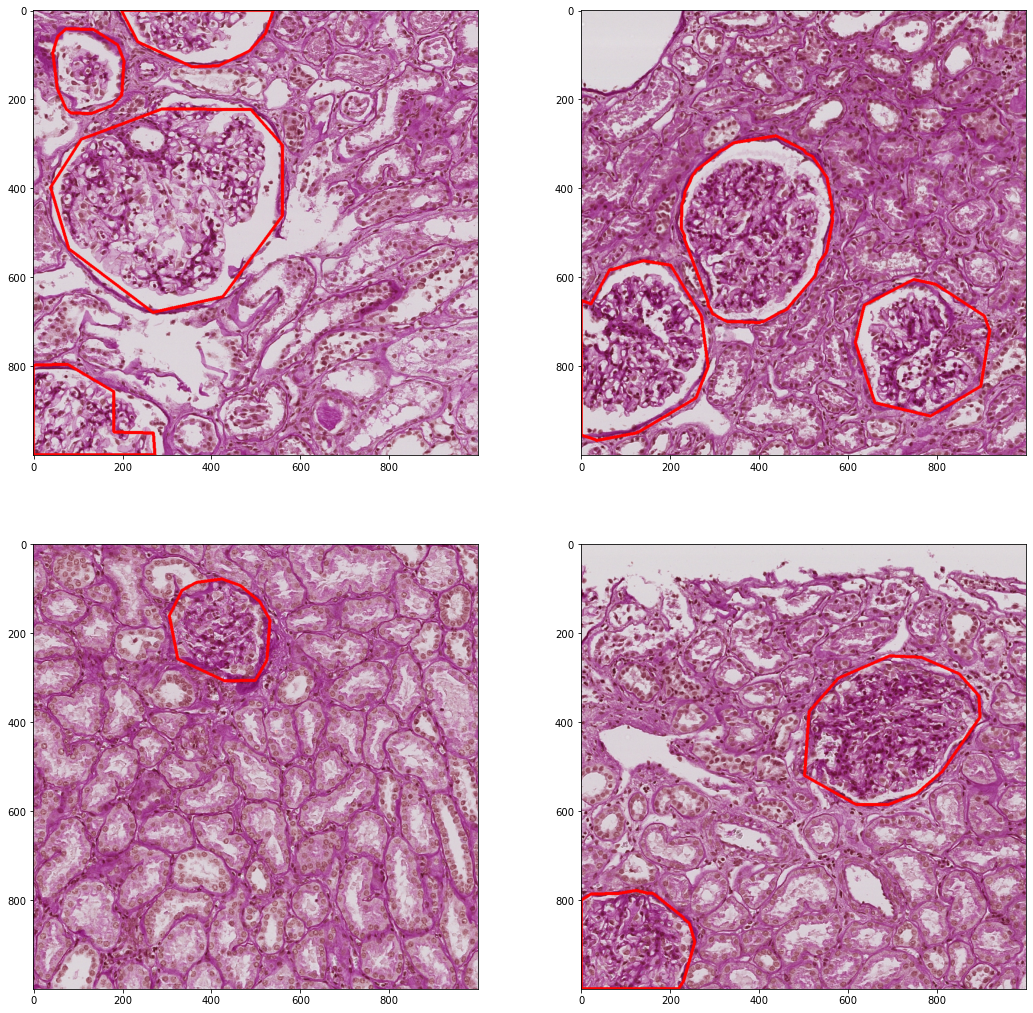

In [8]:
#We can zoom-in on multiple regions of the image where we can find glomeruli
seeds_y = [18000, 9000, 3000, 2000]
seeds_x = [8000, 4000, 19500, 11000]
glm_img = np.copy(org_img)
f, axs = plt.subplots(2,2, figsize=(18,18))
for i, ax in enumerate(axs.flat):
    a,b = seeds_y[i], seeds_x[i]
    A = mask_to_contours(glm_img[a:a+1000, b:b+1000], mask[a:a+1000, b:b+1000], thickness=5)
    ax.imshow(A)

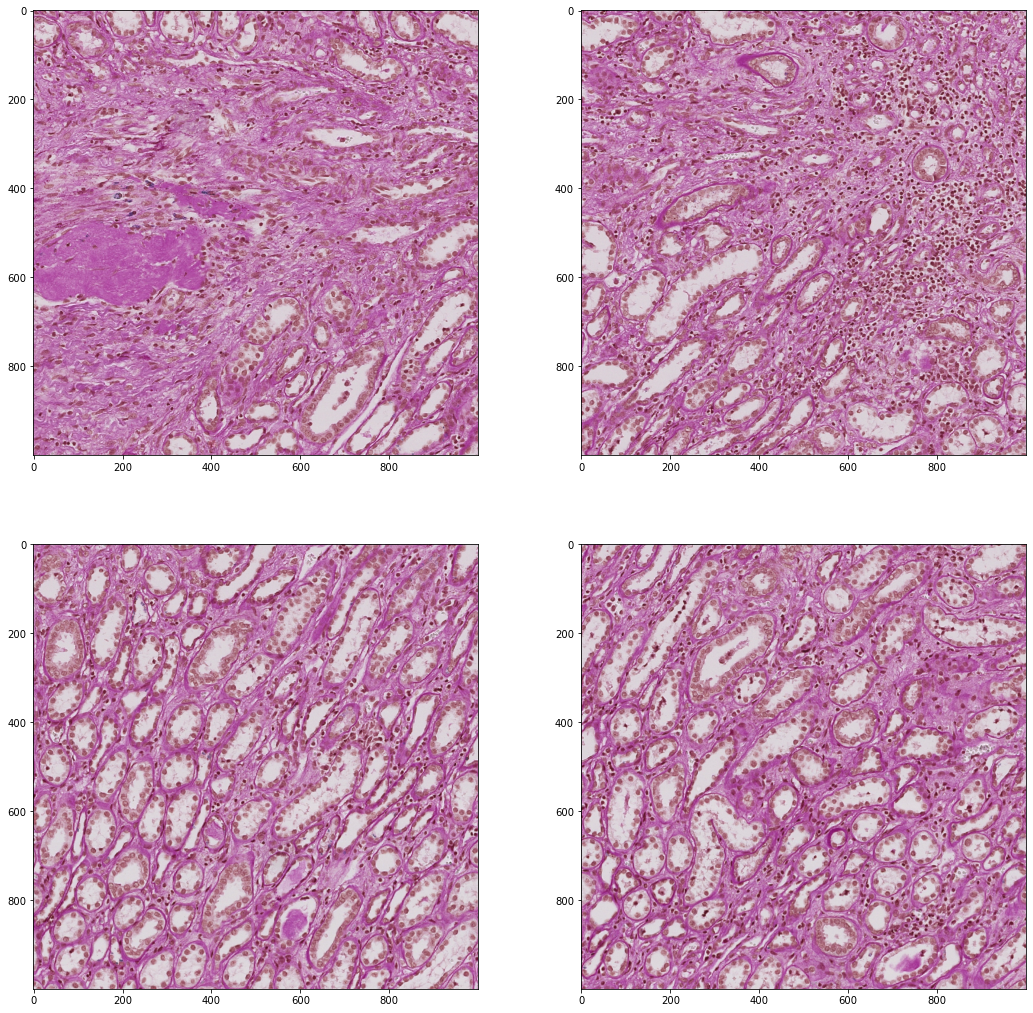

In [9]:
#We can zoom-in on multiple regions of the image but delimited to the Medulla
seeds_y = [10000, 10000, 11000, 11000]
seeds_x = [15000, 16000, 15000, 16000]
f, axs = plt.subplots(2,2, figsize=(18,18))
for i, ax in enumerate(axs.flat):
    a,b = seeds_y[i], seeds_x[i]
    A = mask_to_contours(glm_img[a:a+1000, b:b+1000], mask[a:a+1000, b:b+1000], thickness=5)
    ax.imshow(A)

<h3 style="font-size: 1.5em"> 3.2 <a id="Data">Analyzing patient data</a></h3>

In [10]:
my_df = pd.read_csv("../input/hubmap-kidney-segmentation/HuBMAP-20-dataset_information.csv")
my_df

image_file  width_pixels  height_pixels  \
0   afa5e8098.tiff         43780          36800   
1   54f2eec69.tiff         22240          30440   
2   1e2425f28.tiff         32220          26780   
3   e79de561c.tiff         27020          16180   
4   c68fe75ea.tiff         19780          26840   
5   095bf7a1f.tiff         39000          38160   
6   26dc41664.tiff         42360          38160   
7   aaa6a05cc.tiff         13013          18484   
8   b9a3865fc.tiff         40429          31295   
9   cb2d976f4.tiff         49548          34940   
10  b2dc8411c.tiff         31262          14844   
11  0486052bb.tiff         34937          25784   
12  2f6ecfcdf.tiff         25794          31278   

   anatomical_structures_segmention_file glomerulus_segmentation_file  \
0    afa5e8098-anatomical-structure.json               afa5e8098.json   
1    54f2eec69-anatomical-structure.json               54f2eec69.json   
2    1e2425f28-anatomical-structure.json               1e2425f28.json   
3    e79de561c-anatomical-structure.json               e79de561c.json   
4    c68fe75ea-anatomical-structure.json               c68fe75ea.json   
5    095bf7a1f-anatomical-structure.json               095bf7a1f.json   
6    26dc41664-anatomical-structure.json               26dc41664.json   
7    aaa6a05cc-anatomical-structure.json               aaa6a05cc.json   
8    b9a3865fc-anatomical-structure.json               b9a3865fc.json   
9    cb2d976f4-anatomical-structure.json               cb2d976f4.json   
10   b2dc8411c-anatomical-structure.json               b2dc8411c.json   
11   0486052bb-anatomical-structure.json               0486052bb.json   
12   2f6ecfcdf-anatomical-structure.json               2f6ecfcdf.json   

    patient_number                       race               ethnicity     sex  \
0            67347                      White  Not Hispanic or Latino  Female   
1            67548  Black or African American  Not Hispanic or Latino    Male   
2            63921                      White  Not Hispanic or Latino    Male   
3            67026  Black or African American  Not Hispanic or Latino    Male   
4            67112                      White  Not Hispanic or Latino    Male   
5            68250                      White  Not Hispanic or Latino  Female   
6            68304                      White  Not Hispanic or Latino  Female   
7            65631                      White  Not Hispanic or Latino  Female   
8            67347                      White  Not Hispanic or Latino  Female   
9            67548  Black or African American  Not Hispanic or Latino    Male   
10           67026  Black or African American  Not Hispanic or Latino    Male   
11           67177                      White  Not Hispanic or Latino    Male   
12           68555                      White  Not Hispanic or Latino  Female   

    age  weight_kilograms  height_centimeters  bmi_kg/m^2 laterality  \
0    58              59.0               160.0        23.0      Right   
1    58              79.9               190.5        22.0      Right   
2    48             131.5               193.0        35.3      Right   
3    53              73.0               166.0        26.5       Left   
4    56              91.2               167.6        32.5       Left   
5    44              71.7               160.0        28.0      Right   
6    66              71.3               167.6        25.4       Left   
7    73               NaN                 NaN         NaN       Left   
8    58              59.0               160.0        23.0      Right   
9    58              79.9               190.5        22.0      Right   
10   53              73.0               166.0        26.5       Left   
11   31             106.1               180.3        32.6      Right   
12   76              93.0               157.4        37.5       Left   

    percent_cortex  percent_medulla  
0               55               45  
1               75               25  
2           

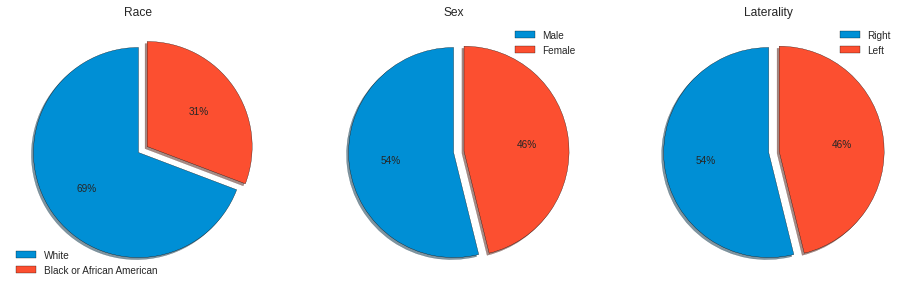

In [11]:
plt.style.use('seaborn')

RC = my_df['race'].value_counts()
SX = my_df['sex'].value_counts()
LT = my_df['laterality'].value_counts()

colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
explode2 = (0.2, 0)

f = plt.gcf()
f.set_size_inches(16,6)
plt.subplot(1,3,1)

plt.pie(RC, startangle=90, colors=colors, 
        wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', 
        explode=explode, shadow=True)
plt.title("Race")
plt.legend(loc='best', labels=RC.keys(), fontsize='medium')

plt.subplot(1,3,2)
plt.pie(SX, startangle=90, colors=colors, 
        wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', 
        explode=explode, shadow=True)
plt.title("Sex")
plt.legend(loc='best', labels=SX.keys(), fontsize='medium')

plt.subplot(1,3,3)
plt.pie(LT, startangle=90, colors=colors, 
        wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', 
        explode=explode, shadow=True)
plt.title("Laterality")
plt.legend(loc='best', labels=LT.keys(), fontsize='medium')
plt.show()

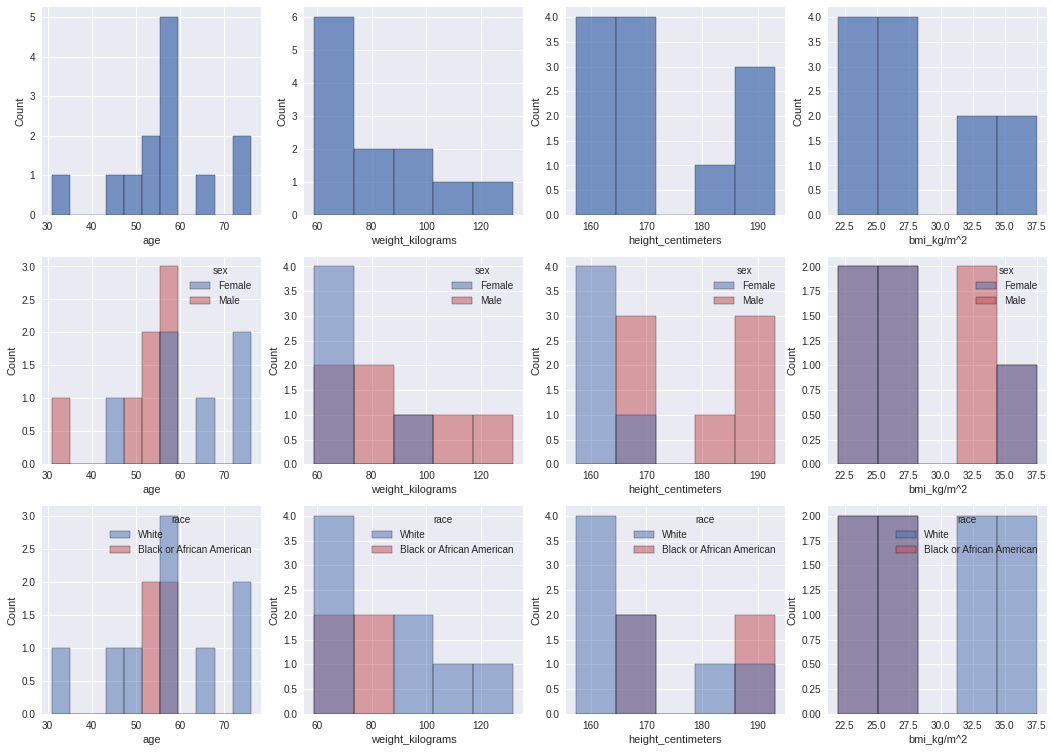

In [12]:
fig = plt.gcf()
fig.set_size_inches(18,13)
plt.subplot(3,4,1)
sns.histplot(x="age",data=my_df)
plt.subplot(3,4,2)
sns.histplot(x="weight_kilograms",data=my_df)
plt.subplot(3,4,3)
sns.histplot(x="height_centimeters",data=my_df)
plt.subplot(3,4,4)
sns.histplot(x="bmi_kg/m^2",data=my_df)

plt.subplot(3,4,5)
sns.histplot(x="age", hue="sex", data=my_df, palette=sns.color_palette()[0:4:2])
plt.subplot(3,4,6)
sns.histplot(x="weight_kilograms", hue="sex",data=my_df, palette=sns.color_palette()[0:4:2])
plt.subplot(3,4,7)
sns.histplot(x="height_centimeters", hue="sex", data=my_df, palette=sns.color_palette()[0:4:2])
plt.subplot(3,4,8)
sns.histplot(x="bmi_kg/m^2", hue="sex", data=my_df, palette=sns.color_palette()[0:4:2])

plt.subplot(3,4,9)
sns.histplot(x="age", hue="race", data=my_df, palette=sns.color_palette()[0:4:2])
plt.subplot(3,4,10)
sns.histplot(x="weight_kilograms", hue="race",data=my_df, palette=sns.color_palette()[0:4:2])
plt.subplot(3,4,11)
sns.histplot(x="height_centimeters", hue="race",data=my_df, palette=sns.color_palette()[0:4:2])
plt.subplot(3,4,12)
sns.histplot(x="bmi_kg/m^2", hue="race",data=my_df, palette=sns.color_palette()[0:4:2])

plt.show()

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRP_n04OUHDX7B1pmwX2U-JlK1BqOdKEcDdA&usqp=CAU" width="500" height="600" alt="Work in progress|please return later" /></center>